# Kernel Comparison

In [1]:
import numpy as np
from zephyr.backend import MiniZephyr, MiniZephyr25D, Eurus, SparseKaiserSource
from scipy.ndimage import gaussian_filter as gf

In [2]:
nx = 100
nz = 100
cBase = 2500.
rScale0 = 2000.
rScale1 = 1000

np.random.seed(1)
c = cBase + rScale0 * gf(np.random.randn(nz, nx), (3,20))
c = c + rScale1 * gf(np.random.randn(nz, nx), (1, 5))

sLoc = np.array([[50.,50.]])

systemConfig = {
    'dx':       1.,                     # m
    'dz':       1.,                     # m
    'c':        c,                      # m/s
    'rho':      1.,                     # kg/m^3
    'nx':       nx,                     # count
    'nz':       nz,                     # count
    'freq':     400.,                   # Hz
    'nky':      200.,
    'theta':    np.pi,
    'eps':      0.5,
    'delta':    0.5,
}

In [3]:
mz2D = MiniZephyr(systemConfig)
mz25 = MiniZephyr25D(systemConfig)
eu2D = Eurus(systemConfig)
sks  = SparseKaiserSource(systemConfig)

In [4]:
q = sks(sLoc)

u_mz2D = mz2D*q
u_mz25 = mz25*q
u_eu2D = eu2D*q

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 1200 # Change this to adjust figure size
matplotlib.rcParams['font.sans-serif'] = ['Lato'] + matplotlib.rcParams['font.sans-serif']

font = {'family':   'sans-serif',
        'weight':   'normal',                    
        'size':     8,
}

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


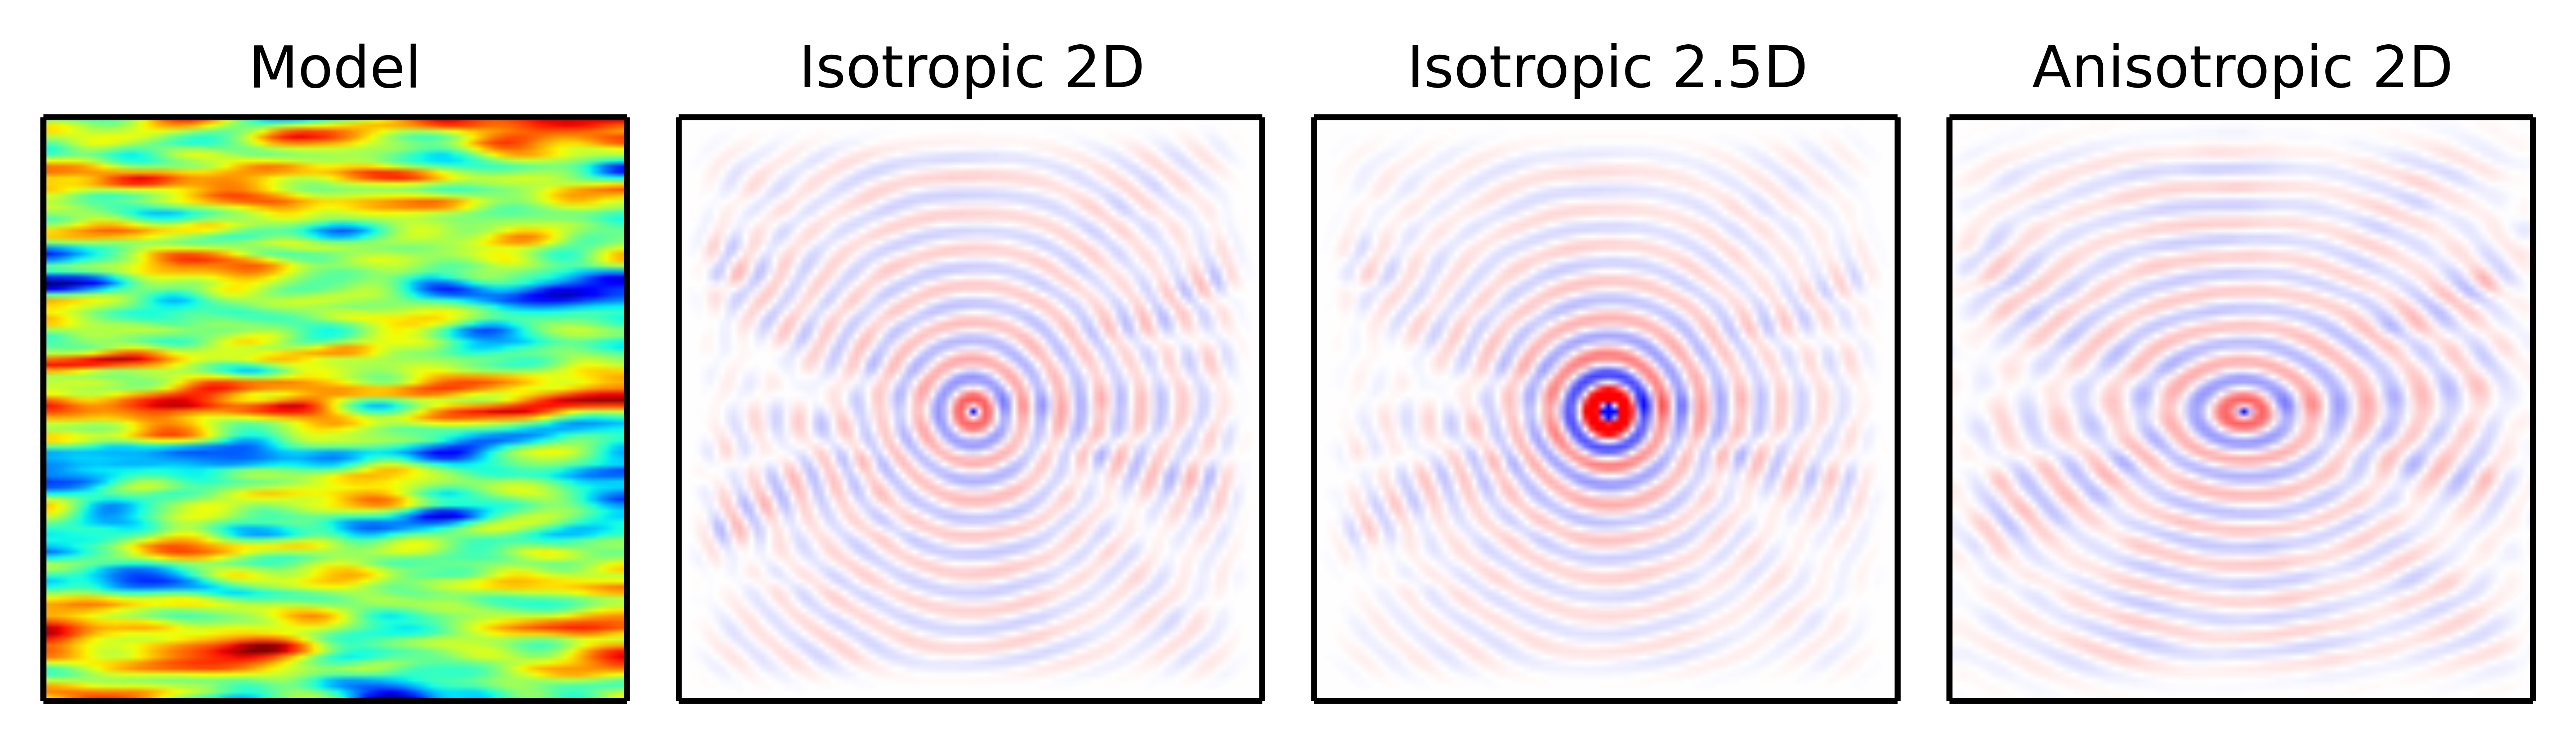

In [6]:
plotOpts = {
    'cmap':     cm.jet,                
}

fig = figure()

ax = subplot(1,4,1)
imshow(c, **plotOpts)
title('Model')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

clip = 0.5*abs(u_mz2D).max()
plotOpts.update({'cmap': cm.bwr, 'vmin': -clip, 'vmax': clip})

ax = subplot(1,4,2)
imshow(u_mz2D.reshape((nz,nx)).real, **plotOpts)
title('Isotropic 2D')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

clip = 0.1*abs(u_mz25).max()
plotOpts.update({'vmin': -clip, 'vmax': clip})

ax = subplot(1,4,3)
imshow(-u_mz25.reshape((nz,nx)).real, **plotOpts)
title('Isotropic 2.5D')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

clip = 0.5*abs(u_eu2D).max()
plotOpts.update({'vmin': -clip, 'vmax': clip})

ax = subplot(1,4,4)
imshow(u_eu2D.reshape((nz,nx)).real, **plotOpts)
title('Anisotropic 2D')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

fig.tight_layout()